I am 0
I am 1
I amI am  23

0
1
2
3
I amI amI amI am    2
13
0

0
1
2
3


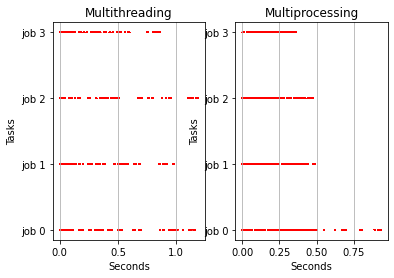

In [11]:
import time
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

import matplotlib.pyplot as plt
import numpy as np


def multithreading(func, args, workers):
    with ThreadPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)


def multiprocessing(func, args, workers):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)


def live_tracker(x):
    print('I am', x)
    reference = time.time()
    l = []
    for i in range(10**6):
        l.append(time.time() - reference)
    return l


def visualize_live_runtimes(results, title):
    for i, exp in enumerate(results):
        print(i)
        plt.scatter(exp, np.ones(len(exp)) * i, alpha=0.8, c='red', edgecolors='none', s=1)

    plt.grid(axis='x')
    plt.ylabel("Tasks")
    ytks = range(len(results))
    plt.yticks(ytks, ['job {}'.format(exp) for exp in ytks])
    plt.xlabel("Seconds")
    plt.title(title)


plt.subplot(1, 2, 1)
visualize_live_runtimes(multithreading(live_tracker, range(4), 4), "Multithreading")
plt.subplot(1, 2, 2)
visualize_live_runtimes(multiprocessing(live_tracker, range(4), 4), "Multiprocessing")
plt.show()